In [23]:
import os
import charts_function_list, date_functions
import datetime as dt
from dateutil.relativedelta import relativedelta
from datetime import datetime, timedelta
from calendar import isleap

In [2]:
_, data, outputs = charts_function_list.folder_setup()

In [4]:
os.chdir(data)
statehood = pd.read_csv('statehood.csv')

In [24]:
statehood['Date Admitted'] = pd.to_datetime(statehood['Date Admitted'])

In [26]:
def date_as_float(dt_):
        size_of_day = 1. / 366.
        size_of_second = size_of_day / (24. * 60. * 60.)
        days_from_jan1 = dt_ - datetime(dt_.year, 1, 1)
        if not isleap(dt_.year) and days_from_jan1.days >= 31+28:
            days_from_jan1 += timedelta(1)
        return days_from_jan1.days * size_of_day + days_from_jan1.seconds * size_of_second

In [32]:
statehood['Month Fraction']=statehood['Date Admitted'].apply(date_as_float)

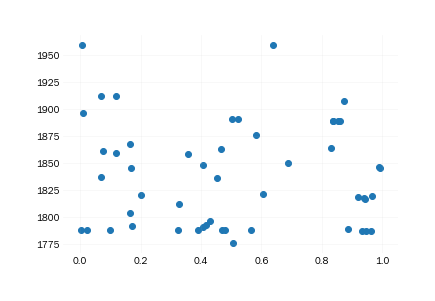

In [33]:
plt.scatter(statehood['Month Fraction'],statehood['Year'])
plt.show()